# Overall Model Test

In [ ]:
import joblib
import pandas as pd

In [ ]:
#load data from csv
df = pd.read_csv("output.csv")
y = df['Target variable ( 1: Defaulters / 0: Non-Defaulters)']
X = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan']]

In [3]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def equi_loans_val(y_true, y_pred):
    valid_predictions = 0
    invalid_predictions = 0
    
    for i in range(0, len(y_pred)):
        if (y_pred[i] == 1):
            if (y_true.array[i] == 1):
                valid_predictions+=1
            else:
                invalid_predictions+=1
    
    return valid_predictions*5-invalid_predictions

In [4]:
#load the saved model - change filename variable as desired
filename = 'XGBoost_custom_scorer.sav'
model = joblib.load(filename)

In [5]:
from sklearn.preprocessing import MinMaxScaler

#setup predictions from model
X_scaler = MinMaxScaler().fit(X.copy())

X_overall_scaled = X_scaler.transform(X.copy())

#compare with the test data!
predictions = model.predict(X_overall_scaled)

In [6]:
#score model
model.score(X_overall_scaled, y)

1844

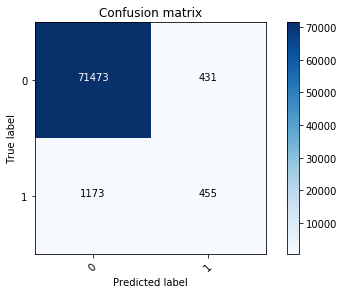

In [7]:
from confusion_matrix_plot import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

thresh = 0.08
predictions [predictions > thresh] = 1
predictions [predictions <= thresh] = 0
cm = confusion_matrix(y, predictions)
plot_confusion_matrix(cm, ['0', '1'], )

## Equivalent Loans Generated (basis for comparing overall model scores)
* The following section describes a value that represents the approximate "equivalent loans" that would be given and not default if this model is used to prevent all personal loan offers to the identified potential defaulter group (assuming all offers would be accepted, so this is a maximum value that may not be reproduced in practice)
* This value represents a good point of comparison to the overall number of loans in the dataset of 73532
* As long as this value is positive, the model likely has some financial worth to the company, even if it is not necessarily optimal
* This number can be used as a metric to compare the results of different saved models after loading them into this notebook

In [8]:
def get_equivalent_loans(conf_matrix):
    return conf_matrix[1][1]*5 - conf_matrix[0, 1] 

num_loans = get_equivalent_loans(cm)
num_loans

1844

In [9]:
#looking at this as a loan that worked successfully, we can approximate the profit from "generating" this many additional loans
#by using the average profit per loan from the financial exploration notebook
def get_savings(loans):
    #get the dollar amount of total savings
    #8164.259838698005 is the profit in rupees per loan
    #0.014 is the exchange rate for rupees to dollars
    return loans*8164.259838698005*0.014

approx_savings = get_savings(num_loans)
approx_savings

210768.5319958277